In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,LeakyReLU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
import random
random.seed(0)
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [3]:
df1 = pd.read_csv(r"C:\Users\vella\Desktop\Praju\College\Projects\Final year\Data\Tesla\stock_yfinance_data.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [4]:
df1.rename(columns = {'Stock Name':'Stock_Name'}, inplace = True)

In [5]:
names = ['TSLA']
df1 = df1[df1.Stock_Name.isin(names)]

In [6]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Stock_Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


In [7]:
df2 = df1.iloc[:,[0,4]]
df2.head()

,Date,Close
0,2021-09-30,258.493347
1,2021-10-01,258.406677
2,2021-10-04,260.510010
3,2021-10-05,260.196655
4,2021-10-06,260.916656


In [8]:
#Converting dates as datetime format
df2.Date = pd.to_datetime(df2.Date)

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\1509892825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Date = pd.to_datetime(df2.Date)


In [9]:
#Converting date column as index
df3 = df2.set_index("Date")

In [10]:
df3

,Close
Date,
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
2021-10-06,260.916656
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


# Actual Prediction

In [11]:
#Create a dataframe with only the 'Create Column
data= df3
#convert the dataframe to a numpy array
dataset= data.values
#get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)* 0.85)
training_data_len

215

In [12]:
#Scale the all of the data to be values between 0 and 1 
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.24481932],
       [0.24438723],
       [0.25487331],
       [0.25331109],
       [0.25690063],
       [0.27494812],
       [0.261454  ],
       [0.27217286],
       [0.29507268],
       [0.30397996],
       [0.31601167],
       [0.35707522],
       [0.40207733],
       [0.39237221],
       [0.39491484],
       [0.44177813],
       [0.4678354 ],
       [0.65924383],
       [0.64855829],
       [0.68084754],
       [0.74595763],
       [0.80737852],
       [0.96457004],
       [0.90376396],
       [0.97332776],
       [1.        ],
       [0.98700461],
       [0.88870793],
       [0.65698373],
       [0.73085169],
       [0.72347316],
       [0.67346901],
       [0.64018276],
       [0.70888238],
       [0.76584956],
       [0.77809716],
       [0.84569998],
       [0.87862062],
       [0.79911922],
       [0.81070211],
       [0.75406736],
       [0.84558374],
       [0.85849606],
       [0.77580389],
       [0.75852093],
       [0.64280846],
       [0.63290403],
       [0.703

In [13]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(67,len(train_data)):
    x_train.append(train_data[i-67:i,0])
    y_train.append(train_data[i,0])

    if i<=67:
      print(x_train)
      print(y_train)
      print()

[array([0.24481932, 0.24438723, 0.25487331, 0.25331109, 0.25690063,
       0.27494812, 0.261454  , 0.27217286, 0.29507268, 0.30397996,
       0.31601167, 0.35707522, 0.40207733, 0.39237221, 0.39491484,
       0.44177813, 0.4678354 , 0.65924383, 0.64855829, 0.68084754,
       0.74595763, 0.80737852, 0.96457004, 0.90376396, 0.97332776,
       1.        , 0.98700461, 0.88870793, 0.65698373, 0.73085169,
       0.72347316, 0.67346901, 0.64018276, 0.70888238, 0.76584956,
       0.77809716, 0.84569998, 0.87862062, 0.79911922, 0.81070211,
       0.75406736, 0.84558374, 0.85849606, 0.77580389, 0.75852093,
       0.64280846, 0.63290403, 0.70393024, 0.73253014, 0.62424596,
       0.64623186, 0.56211045, 0.54898208, 0.57803066, 0.4964852 ,
       0.50587448, 0.45164939, 0.51577891, 0.6326714 , 0.72927289,
       0.77404237, 0.76495221, 0.76116321, 0.73482341, 0.71228919,
       0.94992936, 0.86652258])]
[0.7643705656163826]



In [14]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(148, 67, 1)

In [16]:
#Build the LSTM network model
model = Sequential()

n_input = 1
n_features = 1
    
model.add(LeakyReLU(alpha = 0.05))
model.add(LSTM(50, input_shape=(n_input, n_features)))
#model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=75))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

#model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
#model.add(LSTM(units=50, return_sequences=False))
#model.add(Dense(units=25))
#model.add(Dense(units=1))

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

148/148 [==============================] - 3s 10ms/step - loss: 0.0152


In [19]:
#Test data set
test_data = scaled_data[training_data_len - 180: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(180,len(test_data)):
    x_test.append(test_data[i-67:i,0])

In [20]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [21]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
#Undo scaling

2/2 [==============================] - 1s 7ms/step


In [23]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.020386355576026

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3590450730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


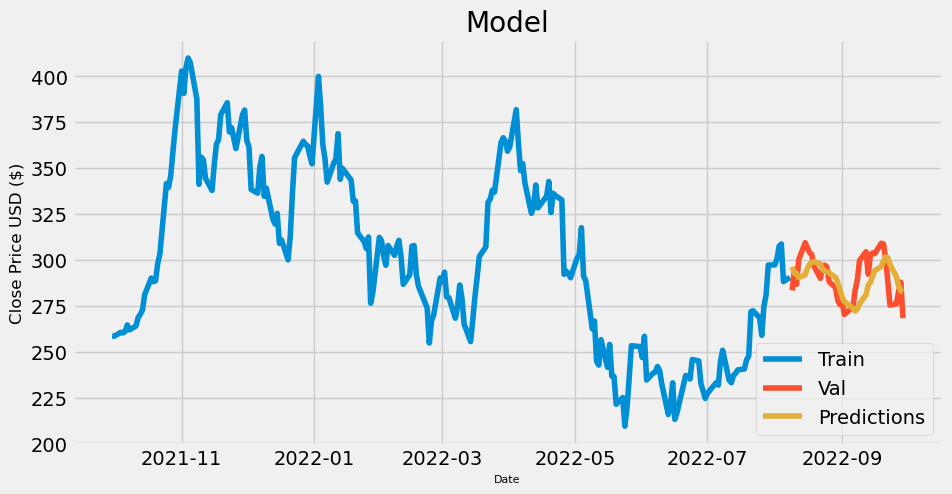

In [24]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Live Predictions

In [25]:
predicted = pd.DataFrame()
for i in range(0,(len(df3)-67)):
    #Create a new dataframe
    new_df = df3[i:(i+67)]
    #Get the last 180 day closing price 
    last_67_days = new_df[-67:].values
    #Scale the data to be values between 0 and 1
    last_67_days_scaled = scaler.transform(last_67_days)
    #Create an empty list
    X_test = []
    #Append teh past 180 days
    X_test.append(last_67_days_scaled)
    #Convert the X_test data set to a numpy array
    X_test = np.array(X_test)
    #Reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    #Get the predicted scaled price
    pred_price = model.predict(X_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price)
    df_pred = pd.DataFrame(pred_price)
    print(df_pred)
    predicted = predicted.append(df_pred, ignore_index=True)

1/1 [==============================] - 0s 24ms/step
            0
0  366.688293
1/1 [==============================] - 0s 23ms/step
            0
0  365.760651
1/1 [==============================] - 0s 21ms/step
            0
0  362.290619
1/1 [==============================] - 0s 22ms/step
            0
0  355.772064


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 27ms/step
            0
0  352.694733
1/1 [==============================] - 0s 23ms/step
            0
0  350.714996
1/1 [==============================] - 0s 24ms/step
            0
0  352.650787
1/1 [==============================] - 0s 20ms/step
            0
0  348.086304


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 20ms/step
            0
0  345.670563
1/1 [==============================] - 0s 21ms/step
            0
0  342.227783
1/1 [==============================] - 0s 21ms/step
            0
0  336.556793
1/1 [==============================] - 0s 23ms/step
            0
0  332.055542


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 31ms/step
            0
0  324.238281
1/1 [==============================] - 0s 21ms/step
            0
0  316.855133
1/1 [==============================] - 0s 21ms/step
            0
0  310.221039
1/1 [==============================] - 0s 21ms/step
            0
0  306.841034


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 30ms/step
            0
0  295.576019
1/1 [==============================] - 0s 28ms/step
            0
0  288.072174
1/1 [==============================] - 0s 24ms/step
            0
0  290.166046
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 20ms/step
            0
0  292.199402
1/1 [==============================] - 0s 23ms/step
            0
0  292.131622
1/1 [==============================] - 0s 21ms/step
            0
0  291.123566
1/1 [==============================] - 0s 22ms/step
           0
0  293.24646


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  293.897949
1/1 [==============================] - 0s 24ms/step
            0
0  295.773895
1/1 [==============================] - 0s 20ms/step
            0
0  298.263885
1/1 [==============================] - 0s 25ms/step
            0
0  298.018951


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  293.995331
1/1 [==============================] - 0s 19ms/step
            0
0  291.963379
1/1 [==============================] - 0s 22ms/step
           0
0  294.34494
1/1 [==============================] - 0s 22ms/step
            0
0  296.532074


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 20ms/step
            0
0  294.364227
1/1 [==============================] - 0s 22ms/step
            0
0  290.873962
1/1 [==============================] - 0s 25ms/step
            0
0  285.056519
1/1 [==============================] - 0s 25ms/step
            0
0  275.568909


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 19ms/step
            0
0  271.023895
1/1 [==============================] - 0s 21ms/step
           0
0  268.47699
1/1 [==============================] - 0s 20ms/step
            0
0  271.842743
1/1 [==============================] - 0s 22ms/step
            0
0  274.470215


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 22ms/step
            0
0  278.101837
1/1 [==============================] - 0s 26ms/step
            0
0  277.757141
1/1 [==============================] - 0s 25ms/step
            0
0  277.358917
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 22ms/step
            0
0  274.222198
1/1 [==============================] - 0s 22ms/step
            0
0  273.316284
1/1 [==============================] - 0s 20ms/step
           0
0  275.58728
1/1 [==============================] - 0s 20ms/step
            0
0  275.809021


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  272.376587
1/1 [==============================] - 0s 23ms/step
            0
0  267.129608
1/1 [==============================] - 0s 21ms/step
            0
0  265.878265
1/1 [==============================] - 0s 21ms/step
            0
0  268.274994
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 22ms/step
            0
0  273.055389
1/1 [==============================] - 0s 22ms/step
            0
0  279.911072
1/1 [==============================] - 0s 22ms/step
           0
0  286.83786
1/1 [==============================] - 0s 22ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  298.566284
1/1 [==============================] - 0s 27ms/step
            0
0  308.399933
1/1 [==============================] - 0s 22ms/step
            0
0  317.268555
1/1 [==============================] - 0s 21ms/step
            0
0  323.703278
1/1 [==============================] - 0s 25ms/step
            0
0  335.319641


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 25ms/step
            0
0  344.979095
1/1 [==============================] - 0s 22ms/step
            0
0  351.669342
1/1 [==============================] - 0s 21ms/step
            0
0  354.933502
1/1 [==============================] - 0s 20ms/step
            0
0  357.394348


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 20ms/step
            0
0  363.932465
1/1 [==============================] - 0s 20ms/step
            0
0  364.203644
1/1 [==============================] - 0s 19ms/step
            0
0  359.827911
1/1 [==============================] - 0s 24ms/step
            0
0  356.614014
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 20ms/step
            0
0  351.040344
1/1 [==============================] - 0s 21ms/step
            0
0  342.068176
1/1 [==============================] - 0s 20ms/step
            0
0  335.516998
1/1 [==============================] - 0s 24ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  333.355103
1/1 [==============================] - 0s 23ms/step
            0
0  328.812317
1/1 [==============================] - 0s 21ms/step
            0
0  326.897858
1/1 [==============================] - 0s 19ms/step
            0
0  327.702179
1/1 [==============================] - 0s 22ms/step
            0
0  324.397003


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  324.452271
1/1 [==============================] - 0s 20ms/step
            0
0  324.488251
1/1 [==============================] - 0s 20ms/step
            0
0  324.098419
1/1 [==============================] - 0s 24ms/step
            0
0  313.677612


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 26ms/step
            0
0  305.460205
1/1 [==============================] - 0s 23ms/step
            0
0  298.753754
1/1 [==============================] - 0s 22ms/step
          0
0  293.1297
1/1 [==============================] - 0s 21ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  291.691772
1/1 [==============================] - 0s 20ms/step
            0
0  291.584839
1/1 [==============================] - 0s 22ms/step
            0
0  295.573029
1/1 [==============================] - 0s 23ms/step
            0
0  292.523804
1/1 [==============================] - 0s 21ms/step
            0
0  289.444366


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 22ms/step
            0
0  280.560333
1/1 [==============================] - 0s 22ms/step
            0
0  274.514893
1/1 [==============================] - 0s 31ms/step
            0
0  264.497253
1/1 [==============================] - 0s 23ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  256.176941
1/1 [==============================] - 0s 29ms/step
            0
0  253.366348
1/1 [==============================] - 0s 25ms/step
            0
0  247.951782
1/1 [==============================] - 0s 21ms/step
            0
0  247.078781
1/1 [==============================] - 0s 21ms/step
            0
0  242.615479


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 24ms/step
            0
0  239.323853
1/1 [==============================] - 0s 25ms/step
           0
0  233.32515
1/1 [==============================] - 0s 21ms/step
            0
0  229.720505
1/1 [==============================] - 0s 22ms/step
          0
0  223.4086


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 24ms/step
            0
0  221.166779
1/1 [==============================] - 0s 23ms/step
            0
0  223.792969
1/1 [==============================] - 0s 20ms/step
            0
0  230.592804
1/1 [==============================] - 0s 20ms/step
            0
0  236.252716
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  239.427719
1/1 [==============================] - 0s 27ms/step
            0
0  244.846405
1/1 [==============================] - 0s 21ms/step
            0
0  243.209869
1/1 [==============================] - 0s 29ms/step
            0
0  242.624298


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 27ms/step
            0
0  242.198914
1/1 [==============================] - 0s 22ms/step
            0
0  242.520432
1/1 [==============================] - 0s 25ms/step
            0
0  242.192886
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 21ms/step
            0
0  240.018509
1/1 [==============================] - 0s 19ms/step
            0
0  234.143951
1/1 [==============================] - 0s 23ms/step
            0
0  230.658936
1/1 [==============================] - 0s 18ms/step
            0
0  230.953079


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 26ms/step
            0
0  226.457703
1/1 [==============================] - 0s 22ms/step
            0
0  223.821594
1/1 [==============================] - 0s 22ms/step
            0
0  226.863968
1/1 [==============================] - 0s 20ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  229.290375
1/1 [==============================] - 0s 21ms/step
            0
0  231.092957
1/1 [==============================] - 0s 21ms/step
            0
0  235.227158
1/1 [==============================] - 0s 22ms/step
            0
0  238.381882
1/1 [==============================] - 0s 22ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  237.806625
1/1 [==============================] - 0s 24ms/step
            0
0  236.176468
1/1 [==============================] - 0s 21ms/step
           0
0  233.77536
1/1 [==============================] - 0s 24ms/step
            0
0  232.479965
1/1 [==============================] - 0s 20ms/step
            0
0  232.881485


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 22ms/step
            0
0  232.912567
1/1 [==============================] - 0s 21ms/step
            0
0  236.135223
1/1 [==============================] - 0s 23ms/step
            0
0  240.324493
1/1 [==============================] - 0s 22ms/step
            0
0  239.586136


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 22ms/step
            0
0  238.545761
1/1 [==============================] - 0s 21ms/step
            0
0  238.614136
1/1 [==============================] - 0s 22ms/step
            0
0  238.948822
1/1 [==============================] - 0s 20ms/step
            0
0  239.622467


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 23ms/step
            0
0  240.255829
1/1 [==============================] - 0s 22ms/step
            0
0  241.972443
1/1 [==============================] - 0s 22ms/step
            0
0  243.819275
1/1 [==============================] - 0s 20ms/step
            0
0  251.331482


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 20ms/step
           0
0  257.51712
1/1 [==============================] - 0s 21ms/step
            0
0  261.377838
1/1 [==============================] - 0s 24ms/step
            0
0  261.818787
1/1 [==============================] - 0s 21ms/step
            0
0  265.896515


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 22ms/step
            0
0  270.541718
1/1 [==============================] - 0s 23ms/step
            0
0  278.197754
1/1 [==============================] - 0s 20ms/step
            0
0  284.198975
1/1 [==============================] - 0s 22ms/step
            0
0  289.545776


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  295.229431
1/1 [==============================] - 0s 21ms/step
            0
0  299.757446
1/1 [==============================] - 0s 22ms/step
            0
0  297.769653
1/1 [==============================] - 0s 22ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  296.188873
1/1 [==============================] - 0s 24ms/step
            0
0  292.788849
1/1 [==============================] - 0s 22ms/step
            0
0  292.556366
1/1 [==============================] - 0s 21ms/step
           0
0  290.34201
1/1 [==============================] - 0s 25ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  291.815704
1/1 [==============================] - 0s 27ms/step
            0
0  295.411469
1/1 [==============================] - 0s 28ms/step
            0
0  297.631378
1/1 [==============================] - 0s 23ms/step
            0
0  298.668121
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 23ms/step
           0
0  299.08783
1/1 [==============================] - 0s 23ms/step
            0
0  297.728821
1/1 [==============================] - 0s 24ms/step
            0
0  294.779083
1/1 [==============================] - 0s 23ms/step
            0
0  293.945221


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 25ms/step
           0
0  293.47287
1/1 [==============================] - 0s 21ms/step
            0
0  292.857269
1/1 [==============================] - 0s 23ms/step
            0
0  290.363434
1/1 [==============================] - 0s 23ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

           0
0  287.50943
1/1 [==============================] - 0s 22ms/step
           0
0  283.45874
1/1 [==============================] - 0s 21ms/step
            0
0  279.727081
1/1 [==============================] - 0s 24ms/step
            0
0  277.247864
1/1 [==============================] - 0s 22ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

            0
0  273.703491
1/1 [==============================] - 0s 22ms/step
            0
0  272.066254
1/1 [==============================] - 0s 22ms/step
            0
0  273.326477
1/1 [==============================] - 0s 23ms/step
            0
0  276.010193
1/1 [==============================] - 0s 21ms/step
            0
0  281.005676


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 21ms/step
            0
0  286.385132
1/1 [==============================] - 0s 24ms/step
            0
0  287.617523
1/1 [==============================] - 0s 26ms/step
            0
0  291.103241
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
            0
0  294.139984
1/1 [==============================] - 0s 22ms/step
            0
0  296.341034
1/1 [==============================] - 0s 23ms/step
            0
0  299.390289
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
            0
0  301.609344
1/1 [==============================] - 0s 22ms/step
            0
0  301.175385
1/1 [==============================] - 0s 24ms/step
           0
0  297.46933
1/1 [==============================] - 0s 22ms/step
            0
0  290.884705


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted

1/1 [==============================] - 0s 23ms/step
            0
0  285.581299
1/1 [==============================] - 0s 24ms/step
           0
0  283.10025
1/1 [==============================] - 0s 23ms/step
           0
0  282.51062


C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_6344\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


In [26]:
predicted.rename(columns = {0:'Prediction'},inplace = True)
predicted

,Prediction
0,366.688293
1,365.760651
2,362.290619
3,355.772064
4,352.694733
...,...
180,297.469330
181,290.884705
182,285.581299
183,283.100250


In [27]:
df4 = pd.DataFrame(np.nan, index=[list(range(67))], columns=['Prediction'])

In [28]:
df4

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
62,NaN
63,NaN
64,NaN
65,NaN


In [29]:
df4 = df4.append(predicted, ignore_index=True)

C:\Users\vella\AppData\Local\Temp\ipykernel_6344\837844078.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(predicted, ignore_index=True)


In [30]:
df4

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,297.469330
248,290.884705
249,285.581299
250,283.100250


In [31]:
extracted_col = list(df4["Prediction"])

In [32]:
df5 = df3
df5

,Close
Date,
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
2021-10-06,260.916656
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


In [33]:
df5["Prediction"] = extracted_col

In [34]:
df5

,Close,Prediction
Date,,
2021-09-30,258.493347,NaN
2021-10-01,258.406677,NaN
2021-10-04,260.510010,NaN
2021-10-05,260.196655,NaN
2021-10-06,260.916656,NaN
...,...,...
2022-09-23,275.329987,297.469330
2022-09-26,276.010010,290.884705
2022-09-27,282.940002,285.581299


In [35]:
df5 = df5.fillna(0)

In [36]:
df7 = df5[67:]
df7

,Close,Prediction
Date,,
2022-01-05,362.706665,366.688293
2022-01-06,354.899994,365.760651
2022-01-07,342.320007,362.290619
2022-01-10,352.706665,355.772064
2022-01-11,354.799988,352.694733
...,...,...
2022-09-23,275.329987,297.469330
2022-09-26,276.010010,290.884705
2022-09-27,282.940002,285.581299


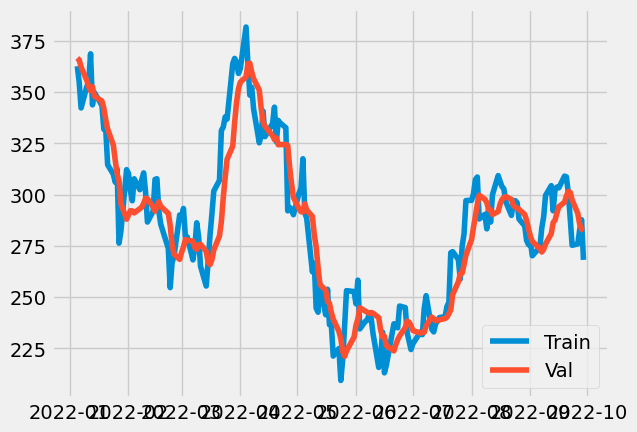

In [37]:
import matplotlib.pyplot as plt
plt.plot(df7[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()